In [1]:
# !pip install pygraphviz
import networkx as nx
from myGAMDIV import *
from mycolors import *
from avalia import *
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from networkx.algorithms import community
from networkx.generators.community import planted_partition_graph

/home/felipe/UFRJ/TCC/MVP/myGAMDIV.py:45: RuntimeWarning: invalid value encountered in true_divide
  new_labels /= row_sums[:, np.newaxis]
/home/felipe/UFRJ/TCC/MVP/myGAMDIV.py:45: RuntimeWarning: invalid value encountered in true_divide
  new_labels /= row_sums[:, np.newaxis]
/home/felipe/UFRJ/TCC/MVP/myGAMDIV.py:45: RuntimeWarning: invalid value encountered in true_divide
  new_labels /= row_sums[:, np.newaxis]
/home/felipe/UFRJ/TCC/MVP/myGAMDIV.py:45: RuntimeWarning: invalid value encountered in true_divide
  new_labels /= row_sums[:, np.newaxis]


In [20]:
k = 2
G2 = planted_partition_graph(k,1000,0.1,0.0001,seed=42)
groundTruth = [(node,data["block"]) for node,data in dict(G2.nodes.data()).items()]

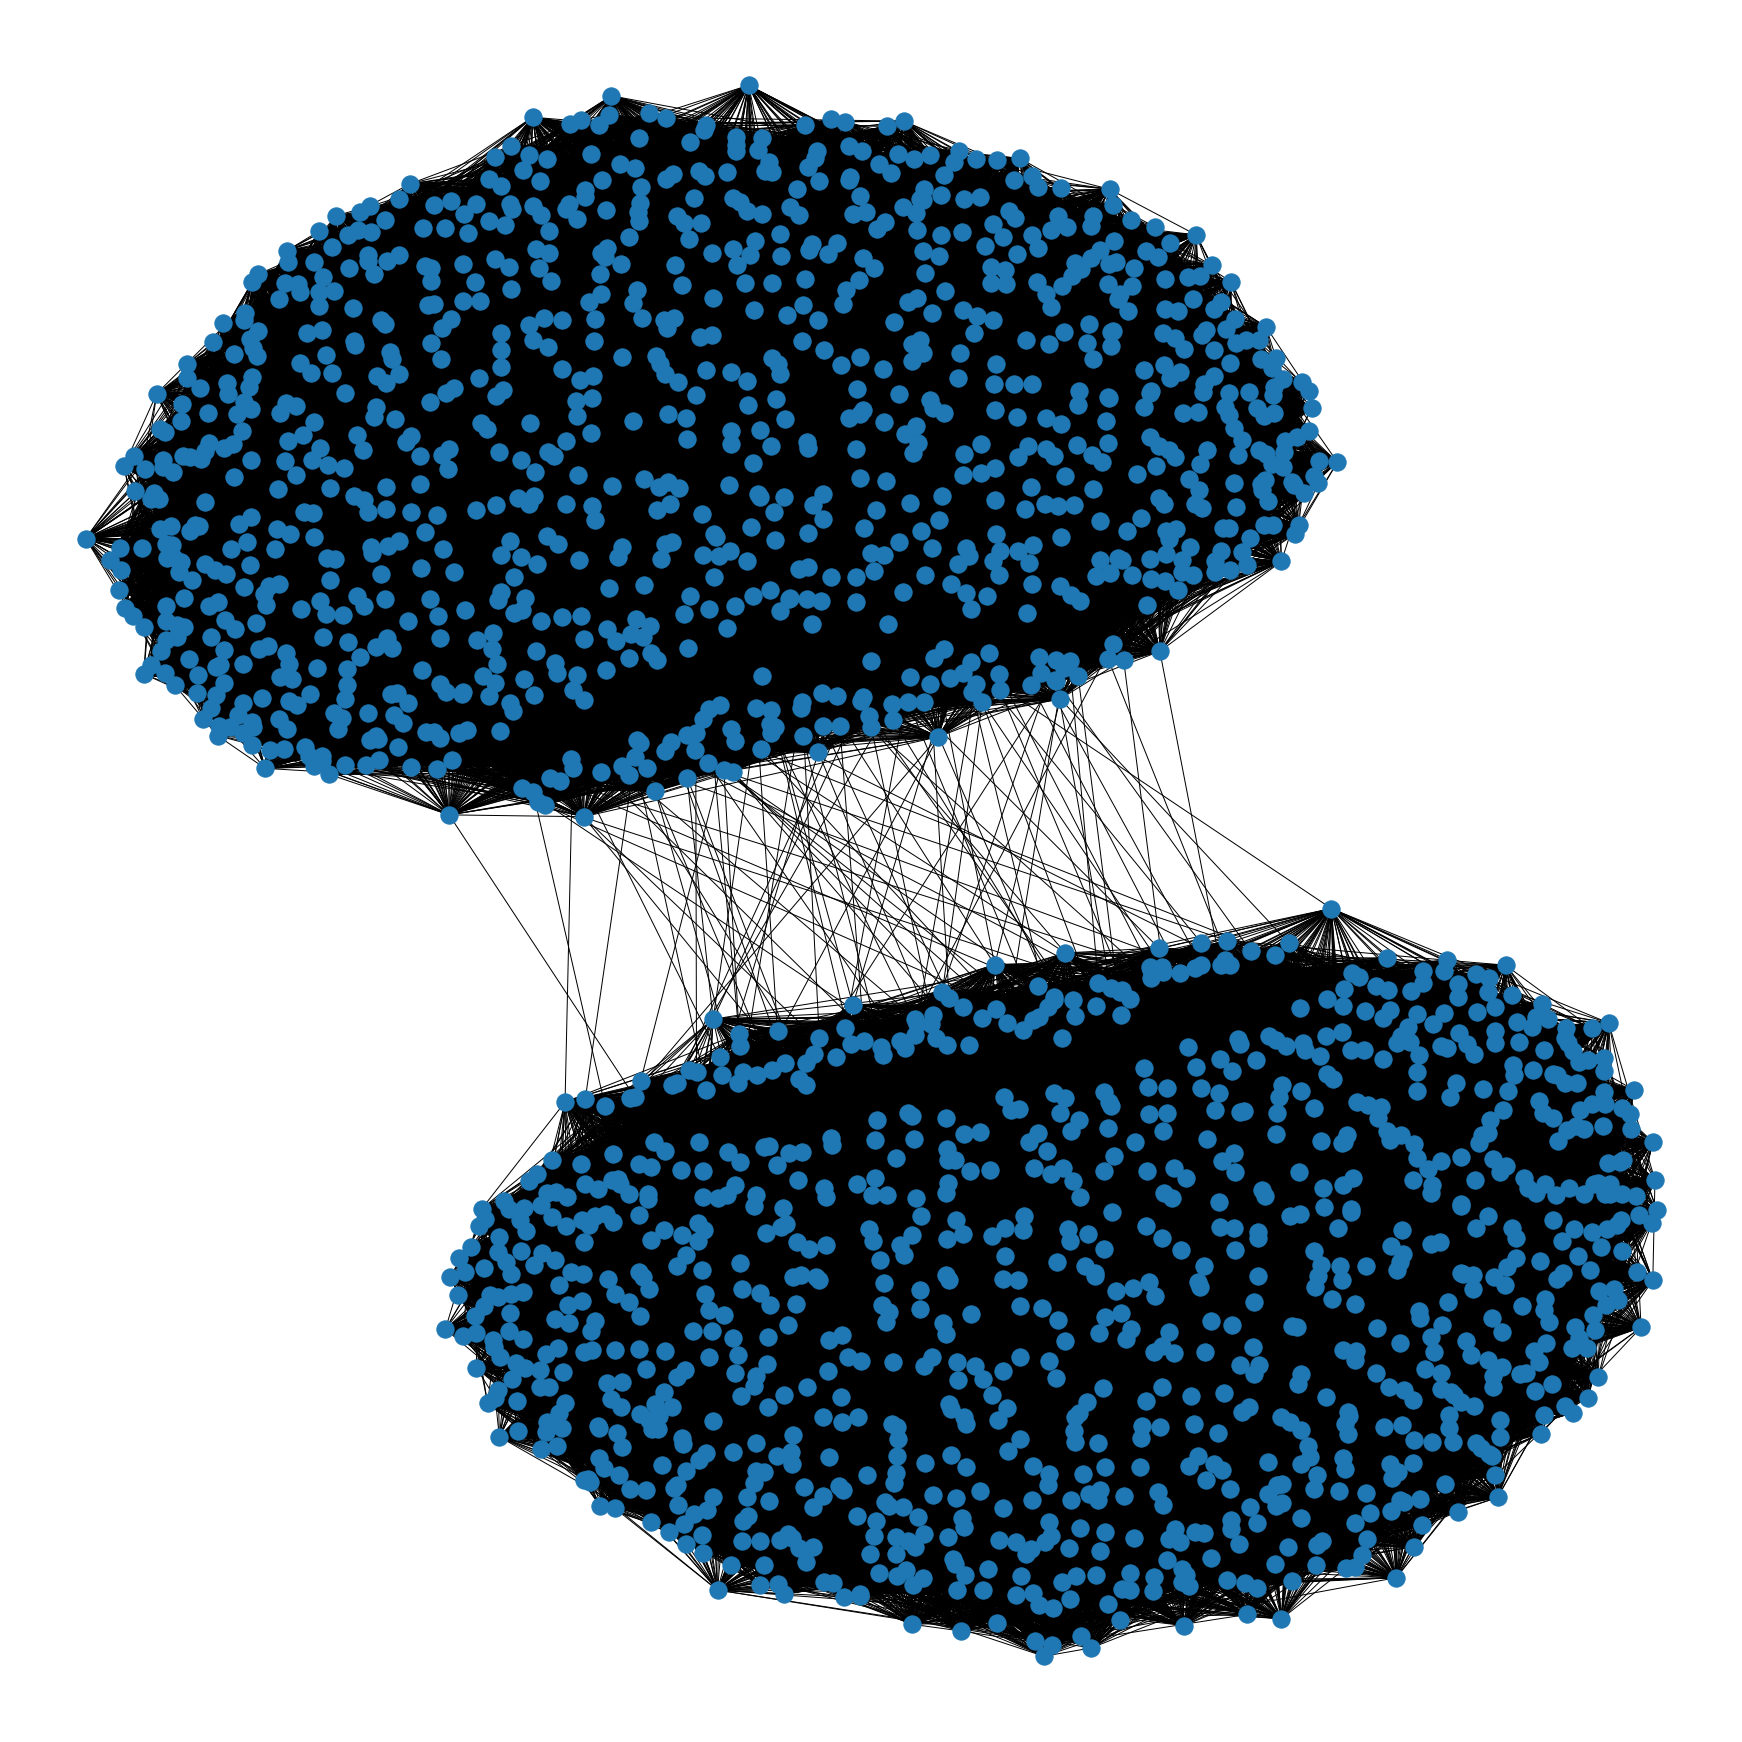

In [21]:
plt.figure(figsize=(24,24))
pos = nx.nx_agraph.graphviz_layout(G2)
nx.draw(G2,pos=pos)

In [4]:
def getBelongings(G):
    node_belonging = []
    for node in G.nodes():
        kin = total = 0
        node_community = G.nodes[node]["block"]
        for n in G.neighbors(node):
            total += 1
            if G.nodes[n]["block"] == node_community:
                kin += 1
        node_belonging.append(kin/total)
    return node_belonging

In [5]:
def makeTest(k_colors,mode,G,true_belongings,retry):
    l = myGAM(G,k_colors,0.001,maxiter=30,mode=mode,retry=retry)
    color_map = getColorMap(G,l,gist_rbw,string_format=False,consider_max=True)
    plt.figure(figsize=(16,16))
    nx.draw(G, node_color=color_map)
    if retry:
        plt.savefig(f"Retry_Teste_com_{k_colors}_labels_mode_{mode}_.png")
    else:
        plt.savefig(f"Teste_com_{k_colors}_labels_mode_{mode}_.png")
    plt.clf()
    structure_found = np.max(l,axis=1)
    plt.figure(figsize=(8,8))
    plt.scatter(node_belongings,structure_found)
    plt.xlabel("Pertencimento real")
    plt.ylabel("Pertencimento retornado pelo algoritmo")
    if retry:
        plt.savefig(f"Retry_Belongings_com_{k_colors}_labels_mode_{mode}_.png")
    else:
        plt.savefig(f"Belongings_com_{k_colors}_labels_mode_{mode}_.png")
    print(f"result of {k_colors}_labels_mode_{mode} in {len(np.unique(color_map))} labels")
    #print(f"result of {k_colors}_labels_mode_{mode} in {l.shape[1]} labels")
    plt.clf()

In [22]:
node_belongings = getBelongings(G2)
node_belongings

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.989247311827957,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.989247311827957,
 1.0,
 0.9896907216494846,
 0.9908256880733946,
 1.0,
 1.0,
 1.0,
 1.0,
 0.990909090909091,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9901960784313726,
 1.0,
 1.0,
 1.0,
 0.989010989010989,
 1.0,
 0.991304347826087,
 1.0,
 1.0,
 0.9833333333333333,
 1.0,
 0.991304347826087,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9895833333333334,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9912280701754386,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9897959183673469,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9900990099009901,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9903846153846154,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 

In [23]:
np.min(node_belongings)

0.9714285714285714

In [24]:
a = np.arange(0,8).reshape(4,2)

In [25]:
mask = np.column_stack([[0,1,2,3],[0,1,1,0]])

In [26]:
for mode in range(0,6):
    makeTest(len(G2),mode,G2,node_belongings,True)

Took 5 rounds

Took 30 rounds

result of 2000_labels_mode_0 in 2 labels
Took 7 rounds

Took 15 rounds

result of 2000_labels_mode_1 in 2 labels
Took 5 rounds

Took 31 rounds

result of 2000_labels_mode_2 in 2 labels
Took 7 rounds

Took 31 rounds

result of 2000_labels_mode_3 in 2 labels
Took 31 rounds

Took 32 rounds

result of 2000_labels_mode_4 in 2 labels
Took 5 rounds

Took 31 rounds

result of 2000_labels_mode_5 in 2 labels


<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [27]:
a = np.array([1,6,6,888,888,888])
np.unique(a,return_inverse=True)

(array([  1,   6, 888]), array([0, 1, 1, 2, 2, 2]))

In [28]:
for x in [k,len(G2)]:
    for mode in range(0,6):
        makeTest(x,mode,G2,node_belongings,False)

Took 6 rounds

result of 2_labels_mode_0 in 1 labels
Took 4 rounds

result of 2_labels_mode_1 in 2 labels
Took 5 rounds

result of 2_labels_mode_2 in 1 labels
Took 9 rounds

result of 2_labels_mode_3 in 1 labels
Took 5 rounds

result of 2_labels_mode_4 in 2 labels
Took 5 rounds

result of 2_labels_mode_5 in 2 labels
Took 5 rounds

result of 2000_labels_mode_0 in 1 labels
Took 7 rounds

result of 2000_labels_mode_1 in 1 labels
Took 5 rounds

result of 2000_labels_mode_2 in 1 labels
Took 7 rounds

result of 2000_labels_mode_3 in 1 labels
Took 31 rounds



<ipython-input-5-eb831d63c03a>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,16))


result of 2000_labels_mode_4 in 2 labels
Took 5 rounds

result of 2000_labels_mode_5 in 1 labels


<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 576x576 with 0 Axes>

# Considerando o modelo feito no COPRA

In [29]:
from myGAM import *

Took 7 rounds
Took 8 rounds


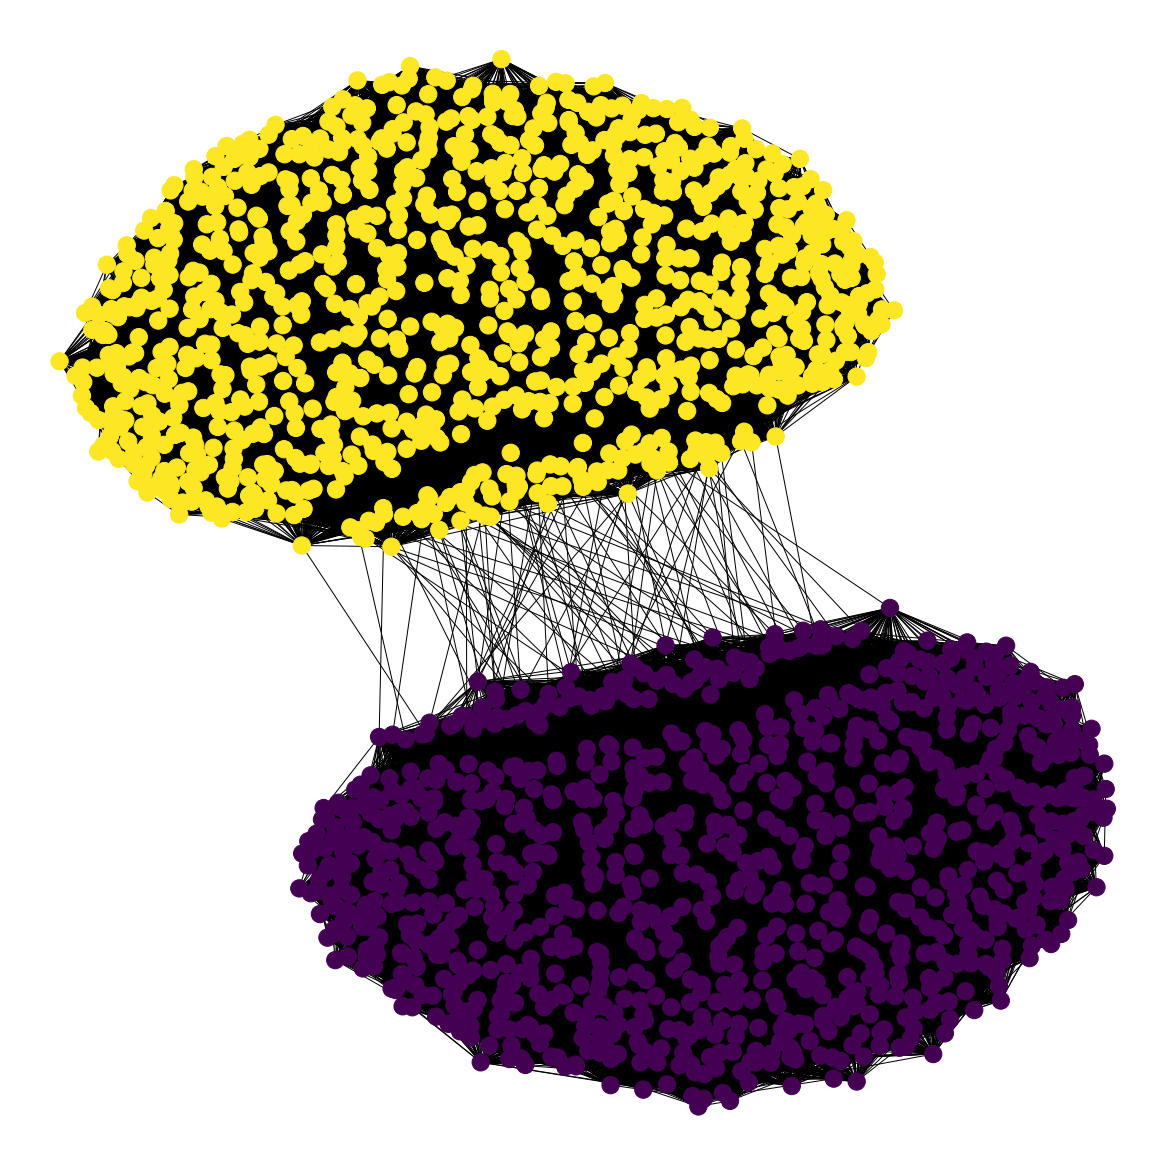

In [36]:
d,a,l = myGAMCopra(G2,3)
color_map = getColorMap(G2,l,gist_rbw,string_format=False,consider_max=True)
plt.figure(figsize=(16,16))
nx.draw(G2, pos=pos, node_color=color_map)

Text(0, 0.5, 'Pertencimento retornado pelo algoritmo')

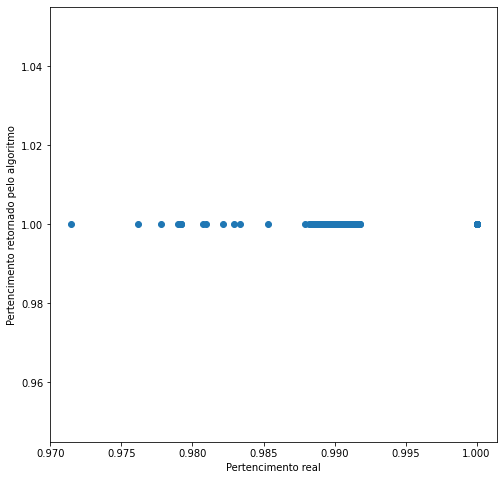

In [37]:
structure_found = np.max(l,axis=1)
plt.figure(figsize=(8,8))
plt.scatter(node_belongings,structure_found)
plt.xlabel("Pertencimento real")
plt.ylabel("Pertencimento retornado pelo algoritmo")

In [38]:
np.unique(color_map)

array([0, 1])

Took 5 rounds
Took 7 rounds


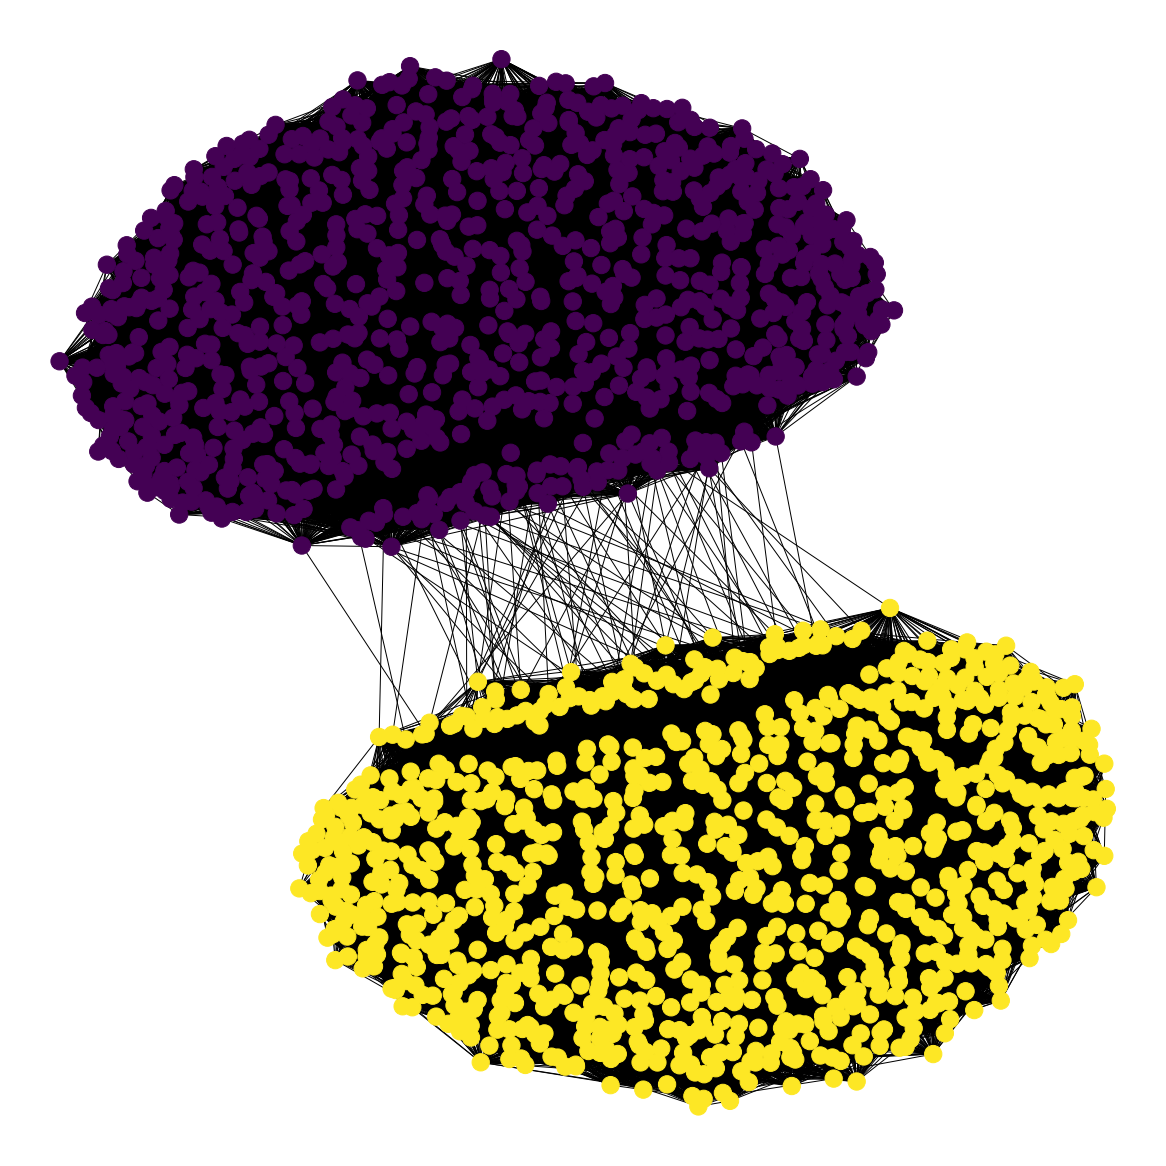

In [39]:
d,a,l = myGAMCopra(G2,len(G2))
color_map = getColorMap(G2,l,gist_rbw,string_format=False,consider_max=True)
plt.figure(figsize=(16,16))
nx.draw(G2, pos=pos, node_color=color_map)

Text(0, 0.5, 'Pertencimento retornado pelo algoritmo')

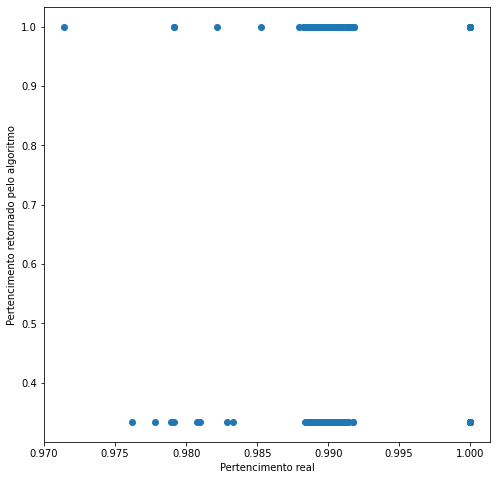

In [40]:
structure_found = np.max(l,axis=1)
plt.figure(figsize=(8,8))
plt.scatter(node_belongings,structure_found)
plt.xlabel("Pertencimento real")
plt.ylabel("Pertencimento retornado pelo algoritmo")

In [35]:
np.unique(color_map)

array([1, 3])